In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

In [173]:
def initcell(w,prob = 0.7):
    data = np.zeros((w,w),dtype=int)
    init = np.array(np.random.rand(w,w)<prob,dtype=int)
    data = data + init
    return data 

In [174]:
def LinSum(data):
    n = data.shape[0]
    DR = list(range(0,n-1))
    DR.insert(0,n-1)
    UL = list(range(1,n))
    UL.insert(n,0)
    num=1*(data[UL,:]==1)+(data[:,UL]==1)+(data[:,DR]==1)+(data[DR,:]==1)+(data[UL,:][:,UL]==1)+(data[DR,:][:,UL]==1)+(data[UL,:][:,DR]==1)+(data[DR,:][:,DR]==1)
    return num

In [175]:
def cellfun(data):
    birth = (LinSum(data) == 3) & (data == 0)
    survive = ((LinSum(data) == 2) | ( LinSum(data)== 3)) & (data == 1)
    data *=0
    data[birth | survive] = 1
    return data

In [176]:
data = initcell(10)

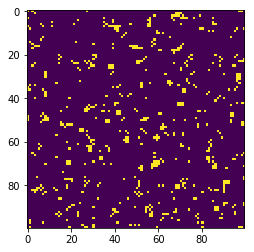

In [19]:
fig = plt.figure()
im = plt.imshow(data, animated=True)
def updatefig(*args):
    cellfun(data)
    im.set_array(data)
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
plt.show()